# Stock Prediction

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For reading stock data from yahoo
import yfinance as yf

# For time stamps
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM

In [1]:
# Stock Details:

stock_list = [
    'COFFEEDAY.NS', 'PKTEA.NS', 'USHAMART.NS', 'IOC.NS', 'SATIA.NS',
    'BHARTIARTL.NS', 'TVSSRICHAK.NS', 'AMRUTANJAN.NS', 'DGCONTENT.NS',
    'INDLMETER.NS', 'M&M.NS', 'TIRUMALCHM.NS', 'BALLARPUR.NS', 'HATHWAY.NS', 'ITC.NS'
]

company_name = [
    'COFFEEDAY', 'PKTEA', 'USHAMART', 'IOC', 'SATIA',
    'BHARTIARTL', 'TVSSRICHAK', 'AMRUTANJAN', 'DGCONTENT',
    'INDLMETER', 'M&M', 'TIRUMALCHM', 'BALLARPUR', 'HATHWAY', 'ITC'
]

### Predicting the closing price stock price

In [2]:
# Prediction data:

company = 'COFFEEDAY.NS'
company_name = 'COFFEEDAY'

In [5]:
#Get the stock quote

df = yf.download(company, start='2012-01-01', end=datetime.now())

# Show the data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-11-02,317.000000,317.000000,266.299988,270.450012,270.450012,18353828
2015-11-03,274.000000,284.850006,272.149994,276.250000,276.250000,4773563
2015-11-04,277.450012,283.500000,275.100006,281.600006,281.600006,1853793
2015-11-05,280.950012,281.399994,276.000000,277.000000,277.000000,785960
2015-11-06,279.000000,279.000000,270.000000,271.049988,271.049988,521576
...,...,...,...,...,...,...
2024-04-09,62.349998,62.500000,59.000000,60.000000,60.000000,2559169
2024-04-10,60.000000,61.750000,58.950001,60.650002,60.650002,2456665
2024-04-12,60.099998,63.700001,59.549999,62.099998,62.099998,6776878


## Close Price History

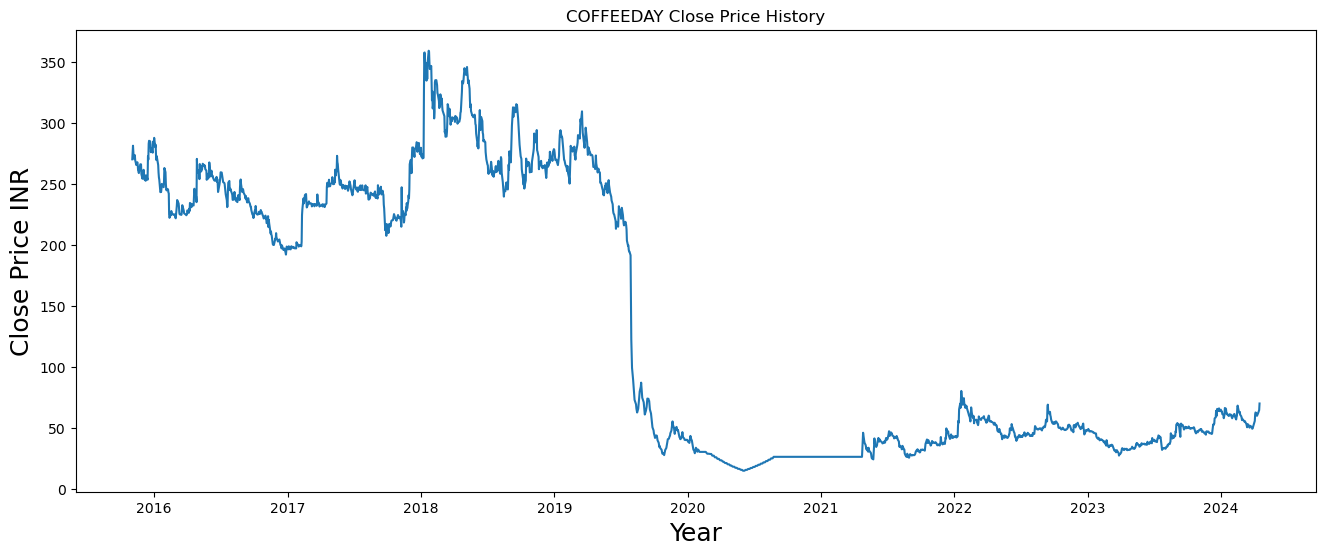

In [8]:
plt.figure(figsize=(16,6))
plt.title(f'{company_name} Close Price History')
plt.plot(df['Close'])
plt.xlabel('Year', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.show()

In [11]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1981

In [12]:
# Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.74143941],
       [0.75827049],
       [0.77379575],
       ...,
       [0.13682531],
       [0.14437028],
       [0.16004063]])

In [14]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.74143941, 0.75827049, 0.77379575, 0.76044692, 0.74318049,
       0.75145097, 0.7395531 , 0.72794543, 0.73447474, 0.72721996,
       0.71488682, 0.71271038, 0.70864772, 0.72518867, 0.7296866 ,
       0.72939639, 0.70603601, 0.69515383, 0.70458505, 0.70385957,
       0.71648292, 0.69602441, 0.69152643, 0.70313409, 0.69065585,
       0.69907143, 0.70255368, 0.69283229, 0.74825884, 0.74085899,
       0.77872895, 0.78554847, 0.78424266, 0.77742314, 0.75841555,
       0.76683117, 0.7572548 , 0.78351718, 0.78279171, 0.78003485,
       0.79251305, 0.77045857, 0.7762624 , 0.75261172, 0.73969824,
       0.74883926, 0.7336042 , 0.72794543, 0.70980846, 0.69834595,
       0.69297739, 0.66323276, 0.66410334, 0.66366803, 0.67150323,
       0.68296579, 0.6781776 , 0.67498552, 0.69022058, 0.72069065])]
[0.7108241515632412]

[array([0.74143941, 0.75827049, 0.77379575, 0.76044692, 0.74318049,
       0.75145097, 0.7395531 , 0.72794543, 0.73447474, 0.72721996,
       0.71488682, 0.71271038, 0.708

In [16]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

C:\Users\iamra\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1921/1921 ━━━━━━━━━━━━━━━━━━━━ 50s 24ms/step - loss: 0.0035


In [17]:
# Create the testing data set

# To check the last 60 day stocks

test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step


9.62920104286603

C:\Users\iamra\AppData\Local\Temp\ipykernel_2352\1753685271.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


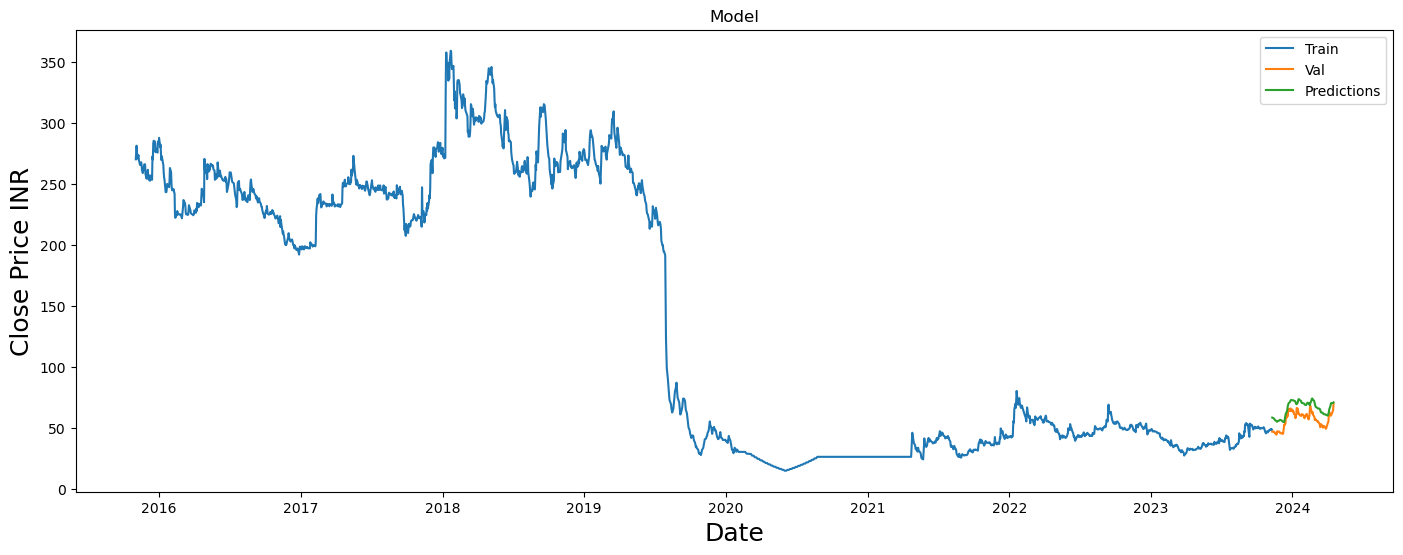

In [18]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(17,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()

In [19]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-11-10,46.950001,58.541023
2023-11-13,47.250000,58.095013
2023-11-15,46.599998,57.571243
2023-11-16,46.450001,56.988911
2023-11-17,45.650002,56.483307
...,...,...
2024-04-09,60.000000,69.784576
2024-04-10,60.650002,70.455795
2024-04-12,62.099998,70.486427


## Candlestick Chart

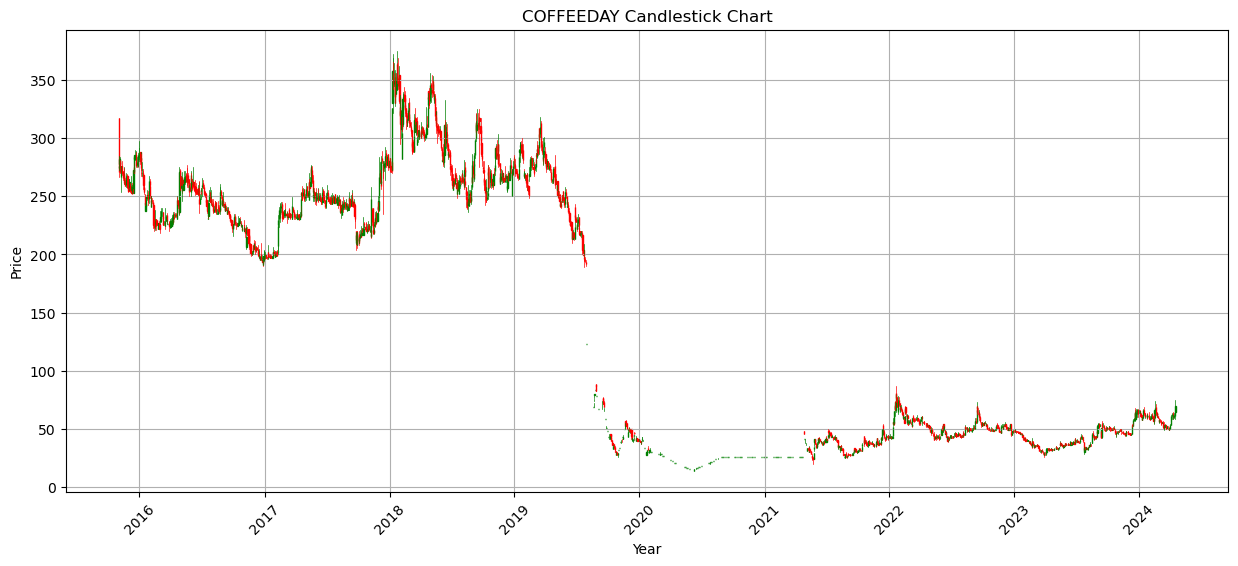

In [22]:
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
# Convert 'Date' column to matplotlib date format
matplotlib_date = mdates.date2num(df.index)

# Create an array of tuples in the required format
ohlc = np.vstack((matplotlib_date, df['Open'], df['High'], df['Low'], df['Close'])).T

plt.figure(figsize=(15, 6))
ax = plt.subplot()
candlestick_ohlc(ax, ohlc, width=0.6, colorup='g', colordown='r')
ax.xaxis_date()
plt.title( f'{company_name} Candlestick Chart')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Closing Prices and 30 Day Moving Average

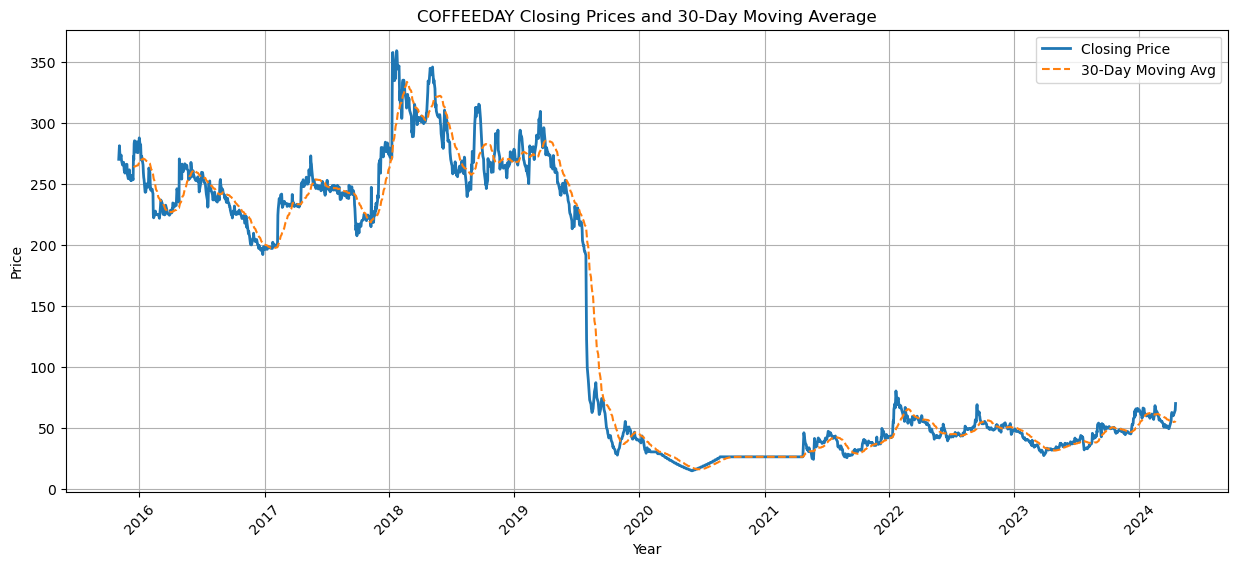

In [24]:
window = 30
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Close'], label='Closing Price', linewidth=2)
plt.plot(df.index, df['Close'].rolling(window=window).mean(), label=f'{window}-Day Moving Avg', linestyle='--')
plt.title(f'{company_name} Closing Prices and {window}-Day Moving Average')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

## Monthly Closing Price

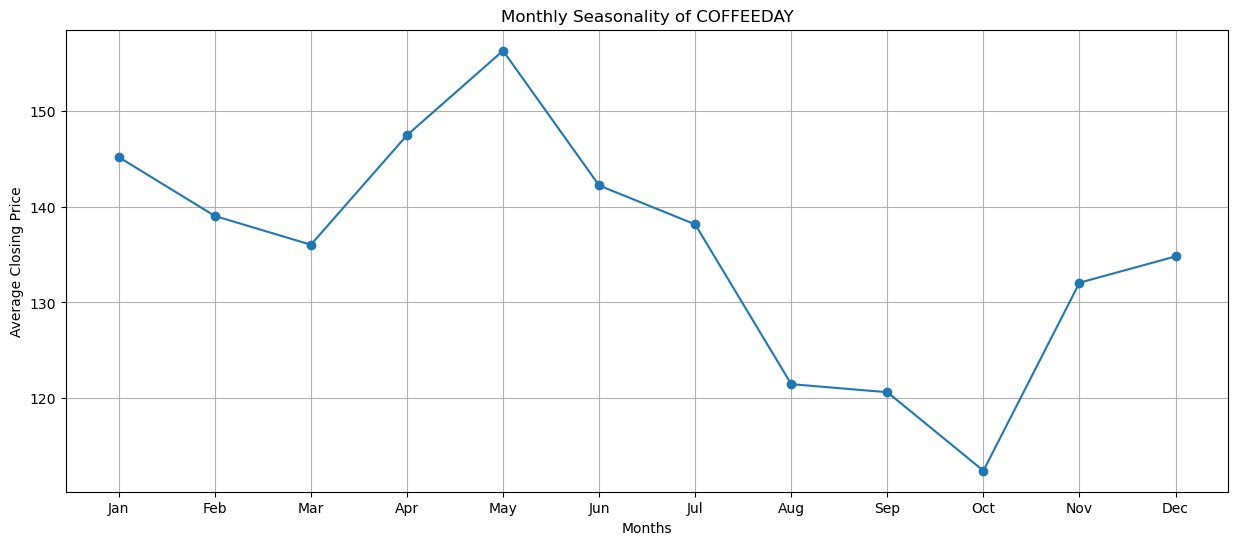

In [25]:
# Monthly Seasonality of Closing Prices
df['Month'] = df.index
df['Month'] = df['Month'].dt.month

monthly_average = df.groupby('Month')['Close'].mean()

plt.figure(figsize=(15, 6))
plt.plot(monthly_average.index, monthly_average.values, marker='o')
plt.title(f'Monthly Seasonality of {company_name}')
plt.xlabel('Months')
plt.ylabel('Average Closing Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

In [26]:
# Dataframe
df.head()

,Open,High,Low,Close,Adj Close,Volume,Month
Date,,,,,,,
2015-11-02,317.000000,317.000000,266.299988,270.450012,270.450012,18353828,11
2015-11-03,274.000000,284.850006,272.149994,276.250000,276.250000,4773563,11
2015-11-04,277.450012,283.500000,275.100006,281.600006,281.600006,1853793,11
2015-11-05,280.950012,281.399994,276.000000,277.000000,277.000000,785960,11
2015-11-06,279.000000,279.000000,270.000000,271.049988,271.049988,521576,11


In [27]:
new_df = df.reset_index()['Close']

In [28]:
# Normalizing our data using MinMaxScaler
scaler = MinMaxScaler()
scaled_data=scaler.fit_transform(np.array(new_df).reshape(-1,1))

In [29]:
# Split into training and testing sets
train_size = int(len(scaled_data) * 0.8)  # 80% for training
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [30]:
# Define the sequence length (number of past time steps)
n_past = 60

# Prepare sequences for LSTM
X_train, y_train = [], []
for i in range(n_past, len(train_data)):
    X_train.append(train_data[i - n_past:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Similarly prepare sequences for the test set
X_test, y_test = [], []
for i in range(n_past, len(test_data)):
    X_test.append(test_data[i - n_past:i, 0])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [31]:
print("Training set size:-")
print(X_train.shape), print(y_train.shape)
print("\n")
print("Testing set size:-")
print(X_test.shape), print(y_test.shape)

Training set size:-
(1608, 60)
(1608,)


Testing set size:-
(357, 60)
(357,)


(None, None)

In [32]:
# Reshape input data for LSTM([samples, time steps, features])
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Model Training

In [33]:
# Libraries for model training
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error

In [34]:
# Initialize a sequential model
model = Sequential()

# First LSTM layer with 50 units, input shape, and return sequences
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))         # Adding dropout to prevent overfitting

# Second LSTM layer with 50 units and return sequences
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Third LSTM layer with 50 units
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Add a dense output layer with one unit
model.add(Dense(units=1))

C:\Users\iamra\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [37]:
# Defining our callbacks
checkpoints = ModelCheckpoint(filepath = 'my_weights.keras', save_best_only = True)
# Defining our early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Training our lstm model
model.fit(X_train, y_train,
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=32,
          verbose=1,
          callbacks= [checkpoints, early_stopping])

Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.0861 - val_loss: 3.6152e-04
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0051 - val_loss: 1.6629e-04
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0045 - val_loss: 1.5854e-04
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0043 - val_loss: 1.5887e-04
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0043 - val_loss: 1.6373e-04
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.0039 - val_loss: 1.8060e-04
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 0.0035 - val_loss: 1.3735e-04
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - loss: 0.0037 - val_loss: 1.3799e-04
Epoch 9/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0031 - val_loss: 1.5956e-04
Epoch 10/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0035 - val_loss: 1.6265e-04
Epoch 11/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0034 - val_loss: 1.2716e-04
Epoch 12

51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - loss: 0.0014 - val_loss: 6.5283e-05
Epoch 67/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0015 - val_loss: 5.8338e-05
Epoch 68/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 0.0014 - val_loss: 8.0106e-05
Epoch 69/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0.0015 - val_loss: 1.4666e-04
Epoch 70/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - loss: 0.0013 - val_loss: 1.7638e-04
Epoch 71/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0014 - val_loss: 1.1986e-04
Epoch 72/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 0.0013 - val_loss: 6.2250e-05
Epoch 73/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0016 - val_loss: 2.5373e-04
Epoch 74/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 0.0014 - val_loss: 1.8478e-04
Epoch 75/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 0.0015 - val_loss: 2.5861e-04
Epoch 76/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 0.0013 - val_loss: 1.5606e-04
Epoch 77/100

In [38]:
# Let's do the prediction and check performance metrics

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [39]:
# Transform back to original form

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [40]:
import math

# Calculate train data RMSE

print(math.sqrt(mean_squared_error(y_train,train_predict)))

# Calculate test data RMSE

print(math.sqrt(mean_squared_error(y_test,test_predict)))

190.70355842669508
46.94963120057173


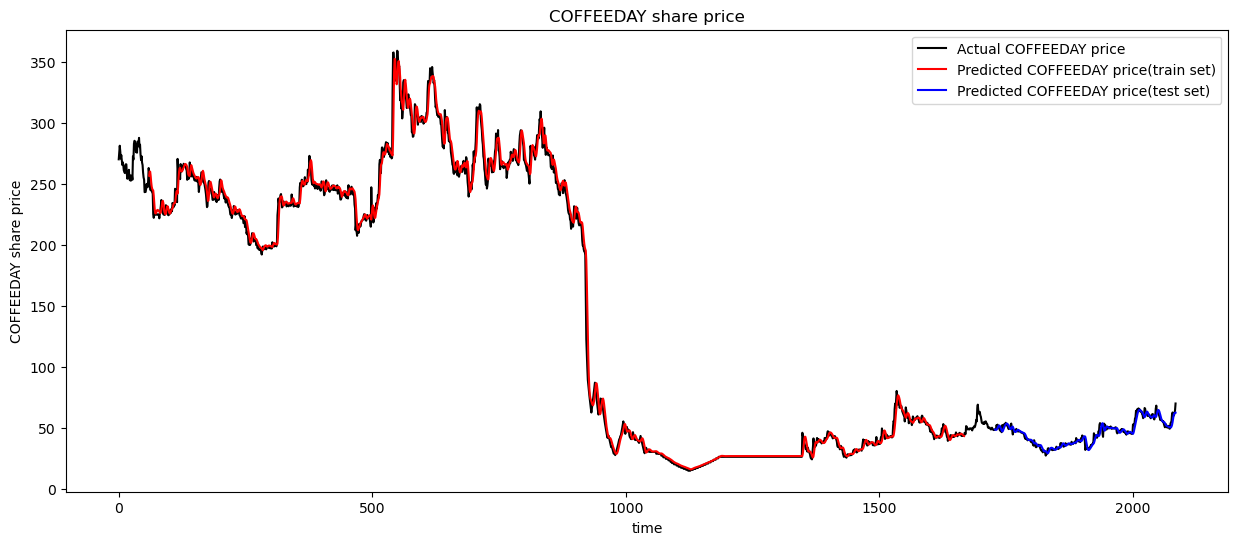

In [41]:
# Set the number of previous time steps to consider for plotting
look_back = 60

# Initialize an array for plotting the train predictions
trainPredictPlot = np.empty_like(new_df)
trainPredictPlot[:] = np.nan
# Assign the predicted values to the appropriate location for train predictions
trainPredictPlot[look_back:len(train_predict)+look_back] = train_predict.flatten()

# Initialize an array for plotting the test predictions
testPredictPlot = np.empty_like(new_df)
testPredictPlot[:] = np.nan
# Calculate the starting index for the test predictions
test_start = len(new_df) - len(test_predict)
# Assign the predicted values to the appropriate location for test predictions
testPredictPlot[test_start:] = test_predict.flatten()

# Rescale the scaled data back to its original scale using the scaler
original_scaled_data = scaler.inverse_transform(scaled_data)

# Plotting the baseline data, training predictions, and test predictions
plt.figure(figsize=(15, 6))
plt.plot(original_scaled_data, color='black', label=f"Actual {company_name} price")
plt.plot(trainPredictPlot, color='red', label=f"Predicted {company_name} price(train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted {company_name} price(test set)")

plt.title(f'{company_name} share price')
plt.xlabel("time")
plt.ylabel(f'{company_name} share price')
plt.legend()
plt.show()

## Next 10 days Prediction

In [43]:
# To predict for the next 10 days, you'll need the last n_past days of data
last_sequence = X_test[-1]

# Reshape the last_sequence to match the input shape of the model
last_sequence = last_sequence.reshape(1, n_past, 1)

# Generate predictions for the next 10 days
predictions_next_10_days = []
for _ in range(10):
    next_day_prediction = model.predict(last_sequence)
    predictions_next_10_days.append(next_day_prediction[0, 0])  # Get the predicted value
    last_sequence = np.roll(last_sequence, -1, axis=1)  # Shift the sequence by one day
    last_sequence[0, -1, 0] = next_day_prediction  # Update the last element with the new prediction

# Transform the predictions back to the original scale
predictions_next_10_days = scaler.inverse_transform(np.array(predictions_next_10_days).reshape(-1, 1))

# Print the predictions for the next 10 days
print(f'{company_name} - Predictions for the next 10 days:')
for i, prediction in enumerate(predictions_next_10_days, start=1):
    print(f"Day {i}: Predicted Price = {prediction[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
COFFEEDAY - Predictions for the next 10 days:
Day 1: Predicted Price = 62.5854606628418
Day 2: Predicted Price = 62.674049377441406
Day 3: Predicted Price = 62.63325500488281
Day 4: Predicted Price = 62.491214752197266
Day 5: Predicted Price = 62.2855224609375
Day 6: Predicted Price = 62.0462532043457
Day 7: Predicted Price = 61.793067932128906
Day 8: Predicted Price = 61.53750991821289
Day 9: Predicted Price = 61.28606414794922
Day 10: Predicted Price = 61.04233932495117


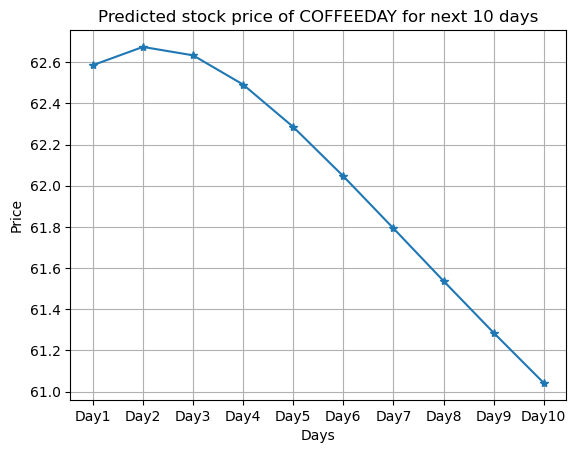

In [44]:
plt.plot(predictions_next_10_days, marker='*')
plt.title(f'Predicted stock price of {company_name} for next 10 days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(0, 10), ['Day1', 'Day2', 'Day3', 'Day4', 'Day5', 'Day6', 'Day7', 'Day8', 'Day9', 'Day10'])
plt.grid(True)
plt.show()